# Theoretical Principles of Deep Learning

## Critical Analysis of a Research Article:
*The sample complexity of pattern classification with neural networks: the size of the weights is more important than the size of the network*  
Peter L. Bartlett  

**Alex Pierron & Matisse Roche**  
*M2 Mathematics and Artificial Intelligence,*  
*Université Paris-Saclay*  
*February 08, 2024*

**Note**: The entire Notebook execution may take **several hours**. Since random generators are properly configured, it is **strongly recommended not to run the Notebook** if the goal is to quickly access the results found and proposed.

In [1]:
from utils import *
%matplotlib inline

c:\Users\alex_\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Single Hidden Layer Neural Networks

We use single hidden layer neural networks that satisfy the conditions of Theorem 28:
- MLPs with one hidden layer are defined with $h_\text{size}$ neurons.
- To generate weights with varying magnitudes, the layers are initialized with a centered normal distribution, with control over the standard deviation.
- Other hyperparameters such as learning rate, number of epochs, etc., remain the same across experiments and are specified directly in the code.
- Stochastic gradient descent (torch.optim.SGD) is used as the optimizer.
- After training, the accuracy on both the training and test sets is displayed and/or recorded. The bound proposed by the article is then calculated for the desired value of $\gamma$ and $\delta$.

Experiments are conducted on the MNIST dataset (even and odd digits) and with synthetically generated data.


In [2]:
# Path to the folder where the datasets are/should be downloaded (e.g. MNIST)
DATASET_PATH = "mnist_data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "../../saved_models"

### MNIST 

In [3]:
from utils_mnist import *

#### Data preparation

The cells below modify the target labels of the MNIST dataset, transforming them into binary labels: 1 for even digits and -1 for odd digits.
Dataloaders are therefore created.

In [4]:
from torch.utils.data import random_split

class ModifiedTargetTransform:
    def __call__(self, target):
        # Modifier la target en 1 si elle est paire, -1 sinon
        return 1 if target % 2 == 0 else -1

target_transform = ModifiedTargetTransform()

transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1307,), (0.3081,)),
])

train_dataset = MNIST(root=DATASET_PATH, train=True, download=True,transform = transform, target_transform=target_transform)
train_size = int(0.8 * len(train_dataset))
val_size = int(0.2 * len(train_dataset))

train_set, val_set = random_split(train_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

test_set = MNIST(root=DATASET_PATH, train=False, transform=transform, download=True, target_transform=target_transform)


In [5]:
train_loader_mnist = data.DataLoader(train_set, batch_size=128, shuffle=True, drop_last=False)

val_loader_mnist   = data.DataLoader(val_set, batch_size=128, shuffle=False, drop_last=False)

test_loader_mnist  = data.DataLoader(test_set, batch_size=128, shuffle=False, drop_last=False)

In [25]:
activation_function = nn.Tanh()
seed = 42
num_epochs = 150
gamma, delta = 0.5, 0.25
lr= 0.01

#### Single experiments


For MNIST,we only conduct single experiments in order to have a better tracking of what is happening during and after training. We here plot the loss function and the accuracy for both train and test set for each experiment.

Training ----------------------- Training 
 Epoch [1/150], Train Loss: 0.9662, Train Accuracy: 59.0750 %
 Epoch [150/150], Train Loss: 0.0888, Train Accuracy: 98.1500 %
Evaluating ----------- Evaluating
Validation Accuracy: 97.6417 %
Validation Loss: 0.1024
tensor(14.8828, grad_fn=<SumBackward0>)
Norme L1 des poids du réseau: 14.8828
 Final bound obtained according to the article : 278.1315625482743


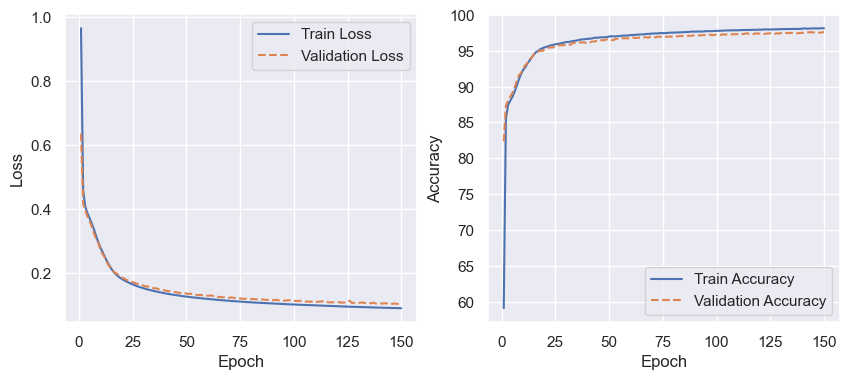

In [26]:
mean_A = 0
std_A = 0.00001
hidden_sizes = [50]
model_A = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_A, mean_A, std_A,seed = seed)

optimizer = optim.SGD(model_A.parameters(), lr=lr)

# Training with saving weights and metrics
metrics = train_mnist(model_A, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = False,
                       save_path='saved_models/mnist_model/model_A/')

checkpoint_path = f"saved_models\mnist_model\model_A\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_A, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

Training ----------------------- Training 
 Epoch [1/150], Train Loss: 30226.5191, Train Accuracy: 48.5583 %
 Epoch [150/150], Train Loss: 0.6667, Train Accuracy: 77.8625 %
Evaluating ----------- Evaluating
Validation Accuracy: 78.2750 %
Validation Loss: 0.6559
tensor(6.8158, grad_fn=<SumBackward0>)
Norme L1 des poids du réseau: 6.8158
 Final bound obtained according to the article : 112.32094654307046


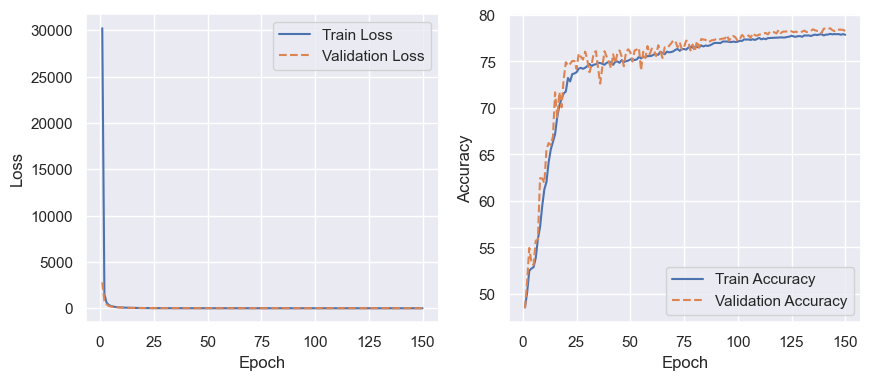

In [32]:
mean_B = 0
std_B = 100
hidden_sizes = [50]
model_B = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_B, mean_B, std_B,seed = seed)

optimizer = optim.SGD(model_B.parameters(), lr=0.01)

# # Training with saving weights and metrics
metrics = train_mnist(model_B, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = False,
                       save_path='saved_models/mnist_model/model_B/')

checkpoint_path = f"saved_models\mnist_model\model_B\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_B, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

Training ----------------------- Training 
 Epoch [1/150], Train Loss: 0.9321, Train Accuracy: 61.2167 %
 Epoch [150/150], Train Loss: 0.0939, Train Accuracy: 98.0542 %
Evaluating ----------- Evaluating
Validation Accuracy: 97.5167 %
Validation Loss: 0.1087
tensor(18.5364, grad_fn=<SumBackward0>)
Norme L1 des poids du réseau: 18.5364
 Final bound obtained according to the article : 357.42277180312936


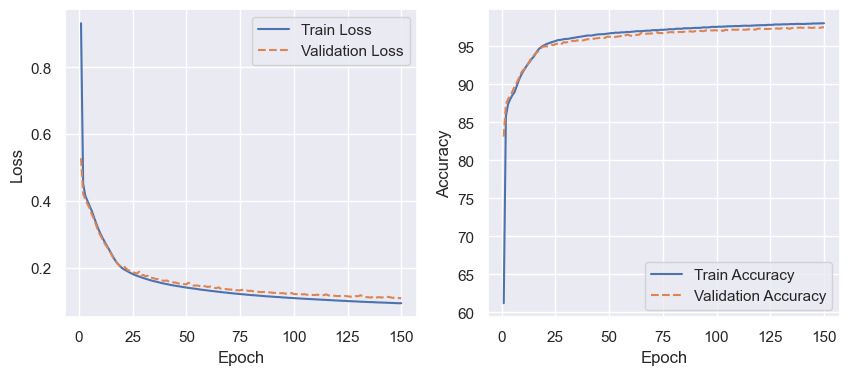

In [28]:
mean_C = 0
std_C = 0.00001
hidden_sizes = [200]
model_C = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_C, mean_C, std_C,seed = seed)

optimizer = optim.SGD(model_C.parameters(), lr=lr)

# # Training with saving weights and metrics
metrics = train_mnist(model_C, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = False,
                       save_path='saved_models/mnist_model/model_C/')

checkpoint_path = f"saved_models\mnist_model\model_C\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_C, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

Training ----------------------- Training 
 Epoch [1/150], Train Loss: 237789.7202, Train Accuracy: 48.7833 %
 Epoch [150/150], Train Loss: 9.1399, Train Accuracy: 69.1917 %
Evaluating ----------- Evaluating
Validation Accuracy: 77.0083 %
Validation Loss: 15.8508
tensor(300.1804, grad_fn=<SumBackward0>)
Norme L1 des poids du réseau: 300.1804
 Final bound obtained according to the article : 7701.107995908704


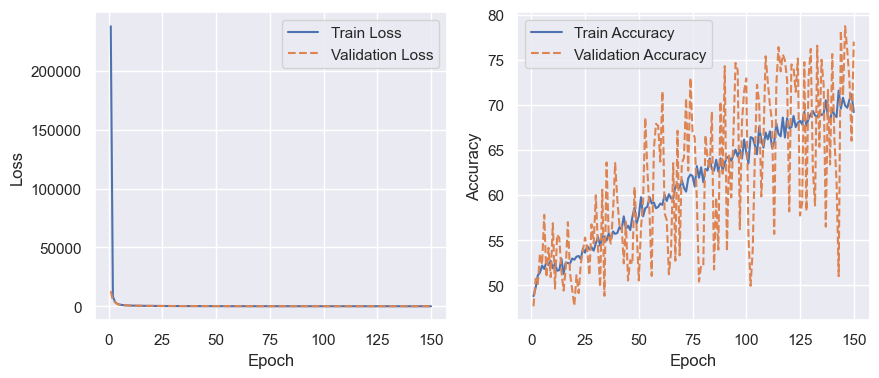

In [31]:
mean_D = 0
std_D = 100
hidden_sizes = [200]
model_D = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_D, mean_D, std_D,seed = seed)

optimizer = optim.SGD(model_D.parameters(), lr=lr)

# # Training with saving weights and metrics
metrics = train_mnist(model_D, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = False,
                       save_path='saved_models/mnist_model/model_D/')

checkpoint_path = f"saved_models\mnist_model\model_D\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_D, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

Validation Accuracy: 47.2417 %
Validation Loss: 157.2825
Training ----------------------- Training 

 Epoch [1/150], Train Loss: 14.8620, Train Accuracy: 61.4896 %
Validation Accuracy: 69.2667 %
Validation Loss: 1.8327

 Epoch [2/150], Train Loss: 1.0928, Train Accuracy: 76.3896 %
Validation Accuracy: 81.0250 %
Validation Loss: 0.7475

 Epoch [3/150], Train Loss: 0.6332, Train Accuracy: 82.8625 %
Validation Accuracy: 84.0250 %
Validation Loss: 0.5655

 Epoch [4/150], Train Loss: 0.5339, Train Accuracy: 84.8125 %
Validation Accuracy: 85.0750 %
Validation Loss: 0.5133

 Epoch [5/150], Train Loss: 0.4938, Train Accuracy: 85.6271 %
Validation Accuracy: 85.9500 %
Validation Loss: 0.4817

 Epoch [6/150], Train Loss: 0.4761, Train Accuracy: 86.0187 %
Validation Accuracy: 85.3333 %
Validation Loss: 0.4838

 Epoch [7/150], Train Loss: 0.4601, Train Accuracy: 86.3833 %
Validation Accuracy: 86.5667 %
Validation Loss: 0.4697

 Epoch [8/150], Train Loss: 0.4507, Train Accuracy: 86.5417 %
Validation

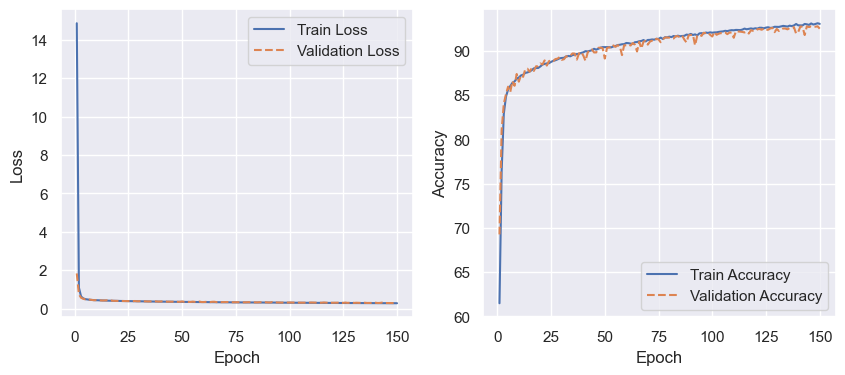

In [20]:
mean_E = 0
std_E = 1
hidden_sizes = [200]
model_E = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_E, mean_E, std_E,seed = seed)

optimizer = optim.SGD(model_E.parameters(), lr=lr)

# # Training with saving weights and metrics
metrics = train_mnist(model_E, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = True,
                       save_path='saved_models/mnist_model/model_E/')

checkpoint_path = f"saved_models\mnist_model\model_E\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_E, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

Validation Accuracy: 47.5917 %
Validation Loss: 42.5139
Training ----------------------- Training 

 Epoch [1/150], Train Loss: 3.7155, Train Accuracy: 65.6604 %
Validation Accuracy: 75.6667 %
Validation Loss: 0.8287

 Epoch [2/150], Train Loss: 0.7022, Train Accuracy: 77.8583 %
Validation Accuracy: 80.0667 %
Validation Loss: 0.6206

 Epoch [3/150], Train Loss: 0.6060, Train Accuracy: 79.8771 %
Validation Accuracy: 80.8250 %
Validation Loss: 0.5781

 Epoch [4/150], Train Loss: 0.5753, Train Accuracy: 80.7000 %
Validation Accuracy: 81.2917 %
Validation Loss: 0.5563

 Epoch [5/150], Train Loss: 0.5586, Train Accuracy: 81.2229 %
Validation Accuracy: 81.7833 %
Validation Loss: 0.5490

 Epoch [6/150], Train Loss: 0.5468, Train Accuracy: 81.6104 %
Validation Accuracy: 82.2667 %
Validation Loss: 0.5331

 Epoch [7/150], Train Loss: 0.5375, Train Accuracy: 82.0333 %
Validation Accuracy: 82.5750 %
Validation Loss: 0.5239

 Epoch [8/150], Train Loss: 0.5287, Train Accuracy: 82.3000 %
Validation A

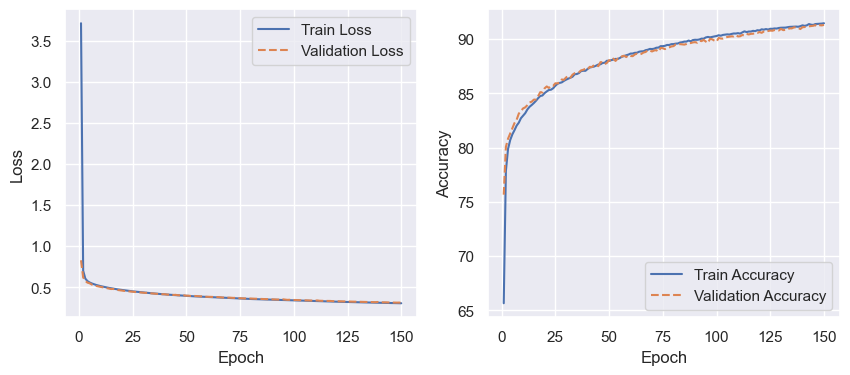

In [21]:
mean_F = 0
std_F = 1
hidden_sizes = [50]
model_F = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_F, mean_F, std_F,seed = seed)

optimizer = optim.SGD(model_F.parameters(), lr = lr)

# # Training with saving weights and metrics
metrics = train_mnist(model_F, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = True,
                       save_path='saved_models/mnist_model/model_F/')

checkpoint_path = f"saved_models\mnist_model\model_F\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_F, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

Validation Accuracy: 47.7333 %
Validation Loss: 1.0000
Training ----------------------- Training 

 Epoch [1/150], Train Loss: 1.0000, Train Accuracy: 50.8104 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [2/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [3/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [4/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [5/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [6/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [7/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Accuracy: 50.9333 %
Validation Loss: 1.0000

 Epoch [8/150], Train Loss: 1.0000, Train Accuracy: 50.8250 %
Validation Ac

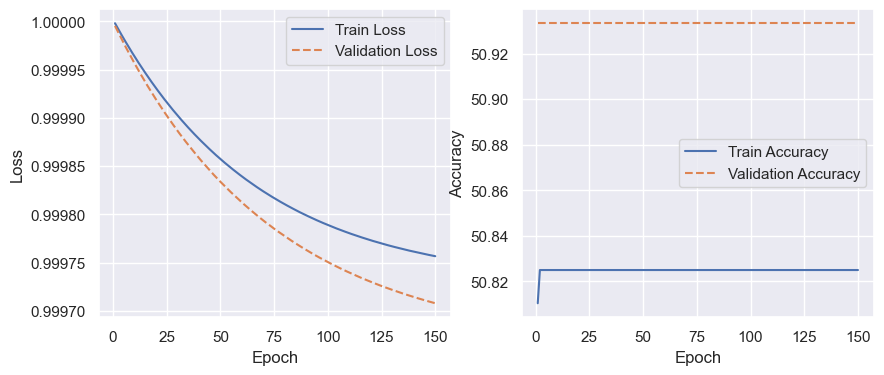

In [30]:
mean_G = 0
std_G = 0.00001
hidden_sizes = [50]
model_G = MLP( 784, hidden_sizes , activation_function = activation_function)
initialize_weights(model_G, mean_G, std_G,seed = seed)

optimizer = optim.SGD(model_G.parameters(), lr = 0.00001)

# # Training with saving weights and metrics
metrics = train_mnist(model_G, train_loader_mnist, val_loader_mnist, optimizer,
                       num_epochs=num_epochs, print_logs = True,
                       save_path='saved_models/mnist_model/model_G/')

checkpoint_path = f"saved_models\mnist_model\model_G\mnist_epoch_{num_epochs}.pth"

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_mnist(model_G, checkpoint_path ,gamma, delta,train_loader_mnist,print_norm=True)}")

### Synthetic data

We want to have control on the number $m$ of training data available. We therefore create some synthetic data so we can generate as many as we want.
All the functions used in this part are accessible in utils_synth.py or utils.py. \
\
The following cell import all the functions needed in this part.

In [27]:
from utils_synth import *
from utils import *

#### Generating Data

In [28]:
# Using the function in utils_synth to generate data
N = 15
mean_1, std_1 = 2, 1
mean_2, std_2 = -15, 40
num_samples = 500000

data, labels = generate_synthetic_data(N, mean_1, std_1, mean_2, std_2, num_samples)

In [29]:
# Dividing the data between a training set and a validation set (or test set here)
train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=0.25, random_state=42)

train_dataset = SyntheticDataset(train_data, train_labels)
val_dataset = SyntheticDataset(val_data, val_labels)

# DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Checking the dimensions of both sets
print(f"Training data dimensions: {train_data.shape}")
print(f"Training labels dimensions: {train_labels.shape}")
print(f"Validation data dimensions: {val_data.shape}")
print(f"Validation labels dimensions: {val_labels.shape}")

Training data dimensions: torch.Size([375000, 15])
Training labels dimensions: torch.Size([375000, 1])
Validation data dimensions: torch.Size([125000, 15])
Validation labels dimensions: torch.Size([125000, 1])


We artificially add noise

In [7]:
# Adding noise to the data
noise_std = 12
noisy_train_data = add_noise(train_data, noise_std)
noisy_val_data = add_noise(val_data, noise_std)


noisy_train_dataset = SyntheticDataset(noisy_train_data, train_labels)
noisy_val_dataset = SyntheticDataset(noisy_val_data, val_labels)


noisy_train_loader = DataLoader(noisy_train_dataset, batch_size=batch_size, shuffle=True)
noisy_val_loader = DataLoader(noisy_val_dataset, batch_size=batch_size, shuffle=False)

#### Single experiments

We first conduct single experiments in order to have a better tracking of what is happening during and after training. We here plot the loss function and the accuracy for both train and test set for each experiment.

In [8]:
#Shared parameters
activation_function = nn.Tanh()
seed = 42
num_epochs = 65
gamma = 0.5
delta = 0.25

Validation Accuracy: 38.0488 %
Validation Loss: 1.0290
Training ----------------------- Training 

 Epoch [1/65], Train Loss: 0.3990, Train Accuracy: 88.2384 %
Validation Accuracy: 90.2640 %
Validation Loss: 0.3755

 Epoch [2/65], Train Loss: 0.3707, Train Accuracy: 90.5691 %
Validation Accuracy: 90.7184 %
Validation Loss: 0.3676

 Epoch [3/65], Train Loss: 0.3638, Train Accuracy: 91.0789 %
Validation Accuracy: 91.3904 %
Validation Loss: 0.3591

 Epoch [4/65], Train Loss: 0.3530, Train Accuracy: 91.8069 %
Validation Accuracy: 91.9920 %
Validation Loss: 0.3449

 Epoch [5/65], Train Loss: 0.3357, Train Accuracy: 92.1024 %
Validation Accuracy: 92.1176 %
Validation Loss: 0.3272

 Epoch [6/65], Train Loss: 0.3119, Train Accuracy: 92.3091 %
Validation Accuracy: 92.5488 %
Validation Loss: 0.2986

 Epoch [7/65], Train Loss: 0.2840, Train Accuracy: 92.7181 %
Validation Accuracy: 93.0432 %
Validation Loss: 0.2701

 Epoch [8/65], Train Loss: 0.2527, Train Accuracy: 93.3315 %
Validation Accuracy: 

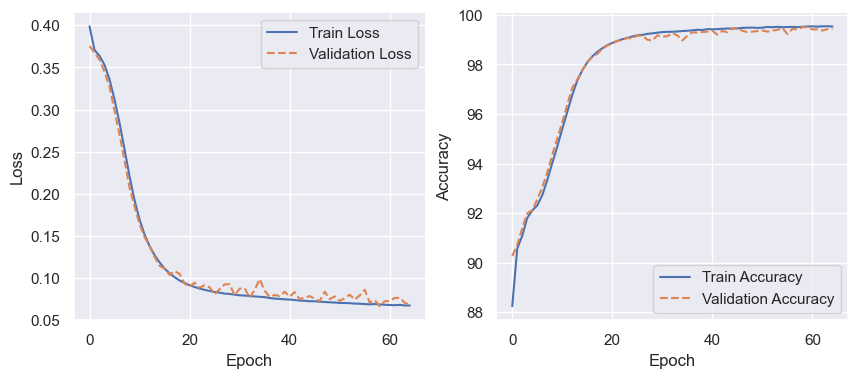

In [16]:
mean_A = 0
std_A = 0.01
hidden_sizes = [50]
model_A_synth = MLP( N, hidden_sizes  , activation_function = activation_function)
initialize_weights(model_A_synth, mean_A, std_A,seed = seed)

optimizer = optim.SGD(model_A_synth.parameters(), lr=0.001)

# # Training with saving weights and metrics
metrics = train_synth(model_A_synth, noisy_train_loader, noisy_val_loader, optimizer,
                       num_epochs=num_epochs , print_logs = True,
                       save_path='saved_models/synth_single_model/model_A')

checkpoint_path = f'saved_models/synth_single_model/model_A/synth_data_epoch_{num_epochs}.pth'

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_synth(model_A_synth, N, checkpoint_path,gamma, delta, noisy_train_loader,print_norm=True)}")

Training ----------------------- Training 
 Epoch [1/65], Train Loss: 0.6123, Train Accuracy: 80.4744 %
 Epoch [65/65], Train Loss: 0.1790, Train Accuracy: 95.6451 %
Evaluating ----------- Evaluating
Validation Accuracy: 95.6288 %
Validation Loss: 0.1860


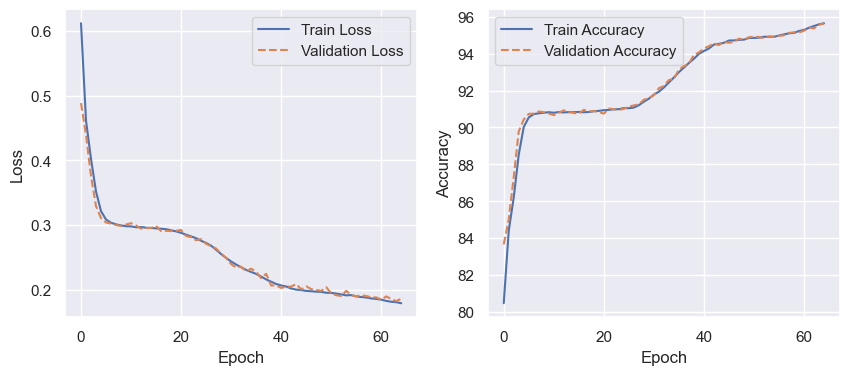

In [17]:
mean_B = 0
std_B = 0.1
hidden_sizes = [200]
model_B_synth = MLP( N, hidden_sizes  , activation_function = activation_function)
initialize_weights(model_B_synth, mean_B, std_B,seed = seed)

optimizer = optim.SGD(model_B_synth.parameters(), lr=0.001)

# # Training with saving weights and metrics
metrics = train_synth(model_B_synth, noisy_train_loader, noisy_val_loader, optimizer,
                       num_epochs=num_epochs, print_logs = False,
                       save_path='saved_models/synth_single_model/model_B')

In [19]:
checkpoint_path = f'saved_models/synth_single_model/model_B/synth_data_epoch_{num_epochs}.pth'

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_synth(model_B_synth, N, checkpoint_path,gamma, delta, noisy_train_loader,print_norm=True)}")

tensor(3.9899, grad_fn=<SumBackward0>)
Norme L1 des poids du réseau: 3.9899
 Final bound obtained according to the article : 3.591971980594729


Training ----------------------- Training 
 Epoch [1/65], Train Loss: 0.3970, Train Accuracy: 88.3864 %
 Epoch [65/65], Train Loss: 0.0485, Train Accuracy: 99.7963 %
Evaluating ----------- Evaluating
Validation Accuracy: 99.7080 %
Validation Loss: 0.0500
tensor(20.7148, grad_fn=<SumBackward0>)
Norme L1 des poids du réseau: 20.7148
 Final bound obtained according to the article : 23.924734225085807


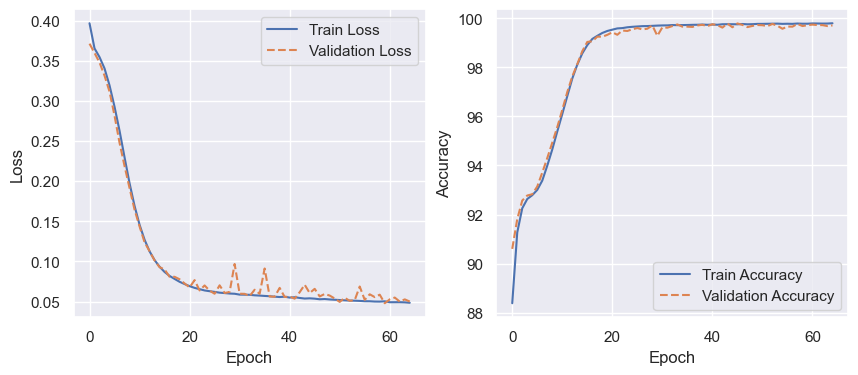

In [20]:
mean_C = 0
std_C = 0.01
hidden_sizes = [200]
model_C_synth = MLP( N, hidden_sizes  , activation_function = activation_function)
initialize_weights(model_C_synth, mean_C, std_C,seed = seed)

optimizer = optim.SGD(model_C_synth.parameters(), lr=0.001)

# # Training with saving weights and metrics
metrics = train_synth(model_C_synth, noisy_train_loader, noisy_val_loader, optimizer,
                       num_epochs=num_epochs, print_logs = False,
                       save_path='saved_models/synth_single_model/model_C')

checkpoint_path = f'saved_models/synth_single_model/model_C/synth_data_epoch_{num_epochs}.pth'

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_synth(model_C_synth, N, checkpoint_path,gamma, delta, noisy_train_loader,print_norm=True)}")

#### Multiple experiments

In order to have a procedure that is easier to analyse, we design a function "comparatif_synth_2_layers" that conduct multiple experiments at once and give back two dataframe with the desired metrics and data. \
**Note**: This function is heavy to run. **It is advised to not run the cell**. All the results obtained are available in the original repo with the hyperparameters described for each case.

In [30]:
""" Uncomment to run 

list_activation_function = [nn.Tanh()]
num_epochs = 150
list_hidden_sizes = [ [[5], [50], [200] ],[ [50],[200] ] ]
param_initialization = [[ [0,0.1], [0,0.01], [0,0.001] ], [ [0, 10] ] ]
dfa, dfb = comparatif_synth_2_layers(N, list_activation_function,
                              list_hidden_sizes, param_initialization,
                              noisy_train_loader, noisy_val_loader,
                              seed = 42, 
                              liste_delta = [0.05, 0.1, 0.2, 0.3, 0.4], liste_gamma = [0.1,0.2, 0.3, 0.4, 0.5],
                              lr = 0.0001, num_epochs = num_epochs,
                              try_number = f"epoch_{num_epochs}")
"""

' Uncomment to run \n\nlist_activation_function = [nn.Tanh()]\nnum_epochs = 150\nlist_hidden_sizes = [ [[5], [50], [200] ],[ [50],[200] ] ]\nparam_initialization = [[ [0,0.1], [0,0.01], [0,0.001] ], [ [0, 10] ] ]\ndfa, dfb = comparatif_synth_2_layers(N, list_activation_function,\n                              list_hidden_sizes, param_initialization,\n                              noisy_train_loader, noisy_val_loader,\n                              seed = 42, \n                              liste_delta = [0.05, 0.1, 0.2, 0.3, 0.4], liste_gamma = [0.1,0.2, 0.3, 0.4, 0.5],\n                              lr = 0.0001, num_epochs = num_epochs,\n                              try_number = f"epoch_{num_epochs}")\n'


the following function will treat the results obtained for a wanted $\delta$ and $\gamma$ ( default :$\delta = 0.3$ et $\gamma = 0.5$).

In [12]:
import pandas as pd
def data_processing(path, delta = 0.3, gamma = 0.5):

    df = pd.read_csv(path)

    selected_rows = df[(df['gamma'] == gamma) & (df['delta'] == delta)]
    
    columns_to_keep = [0, 2, 4, 7, 9, 11]

    df_filtered = selected_rows.iloc[:, columns_to_keep].reset_index(drop=True)

    return df_filtered

#### Results obtained

For a training with a learning rate of 0.001 and for 65 epochs we obtain the following results:

In [21]:
df_A_65 = data_processing("saved_models\synth_model\compare_2_layers\epoch_65\model_A\df_A.csv",delta=0.3)
print(df_A_65.to_string())

   num_epochs hidden_size  param_std  train_accuracy  validation_accuracy      bound
0          75         [5]      0.100       94.161067              94.0832   1.829428
1          75         [5]      0.010       94.467467              94.3960   1.736565
2          75         [5]      0.001       94.580533              94.4592   1.726453
3          75        [50]      0.100       91.303733              91.3664   1.853890
4          75        [50]      0.010       99.536267              99.4504  10.554751
5          75        [50]      0.001       99.430933              99.3352  10.361852
6          75       [200]      0.100       96.166933              96.0344   3.969304
7          75       [200]      0.010       99.789867              99.7480  23.757559
8          75       [200]      0.001       99.680800              99.6144  18.607617


In [22]:
df_B_65 = data_processing("saved_models\synth_model\compare_2_layers\epoch_65\model_B\df_B.csv",delta=0.3)
print(df_B_65.to_string())

   num_epochs hidden_size  param_std  train_accuracy  validation_accuracy    bound
0          75       [200]          1       83.807467              83.6736  1.40628


For a training with a learning rate of 0.0001 and for 75 epochs, we obtain the following:

In [23]:
df_A_75 = data_processing("saved_models\synth_model\compare_2_layers\epoch_75\model_A\df_A.csv",delta=0.3)
print(df_A_75.to_string())

   num_epochs hidden_size  param_std  train_accuracy  validation_accuracy      bound
0          75         [5]      0.100       91.431200              91.4328   1.262616
1          75         [5]      0.010       92.448267              92.3968   1.701384
2          75         [5]      0.001       91.876533              91.8272   1.423291
3          75        [50]      0.100       91.241867              91.2360   0.941871
4          75        [50]      0.010       94.145067              94.1152   6.829223
5          75        [50]      0.001       92.083467              92.0744   2.746920
6          75       [200]      0.100       91.222400              91.2040   1.500228
7          75       [200]      0.010       94.729333              94.6096  14.178629
8          75       [200]      0.001       92.778400              92.7288   5.210229


In [24]:
df_B_75 = data_processing("saved_models\synth_model\compare_2_layers\epoch_75\model_B\df_B.csv",delta=0.2)
print(df_B_75.to_string())

   num_epochs hidden_size  param_std  train_accuracy  validation_accuracy     bound
0          75        [50]         10       82.108267              82.0328  1.903729
1          75       [200]         10       83.742933              83.7496  1.622647


For a training with a learning rate of 0.0001 and for 150 epochs, we obtain the following:

In [25]:
df_A_150 = data_processing("saved_models\synth_model\compare_2_layers\epoch_150\model_A\df_A.csv",delta=0.3)
print(df_A_150.to_string())

   num_epochs hidden_size  param_std  train_accuracy  validation_accuracy      bound
0         150         [5]      0.100       92.926933              92.9416   1.732085
1         150         [5]      0.010       94.666667              94.5280   2.404165
2         150         [5]      0.001       94.598933              94.4120   2.287805
3         150        [50]      0.100       91.160000              91.1608   0.975499
4         150        [50]      0.010       98.593067              98.4248  11.310977
5         150        [50]      0.001       96.826400              96.6392   8.610181
6         150       [200]      0.100       91.207467              91.2016   1.705558
7         150       [200]      0.010       99.225067              99.0464  22.523235
8         150       [200]      0.001       97.520000              97.3112  15.235942


In [26]:
df_B_150 = data_processing("saved_models\synth_model\compare_2_layers\epoch_150\model_B\df_B.csv",delta=0.2)
print(df_B_150.to_string())

   num_epochs hidden_size  param_std  train_accuracy  validation_accuracy     bound
0         150        [50]         10       82.116000              82.0376  1.902386
1         150       [200]         10       83.727733              83.7440  1.630956


In [ ]:
mean_D = 0
std_D = 0.001
hidden_sizes = [50]
model_D_synth = MLP( N, hidden_sizes  , activation_function = activation_function)
initialize_weights(model_D_synth, mean_D, std_D,seed = seed)

optimizer = optim.SGD(model_D_synth.parameters(), lr=0.0001)

num_epochs_test = 15

# # Training with saving weights and metrics
metrics = train_synth(model_D_synth, noisy_train_loader, noisy_val_loader, optimizer,
                       num_epochs=num_epochs_test, print_logs = True,
                       save_path='saved_models/synth_single_model/model_D')

checkpoint_path = f'saved_models/synth_single_model/model_D/synth_data_epoch_{num_epochs_test}.pth'

print(f" Final bound obtained according to the article : {calculate_2_layer_bound_synth(model_D_synth, N, checkpoint_path,gamma, delta, noisy_train_loader,print_norm=True)}")